# Importing the required libraries and packages

In [0]:
import time

import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10

% matplotlib inline

Using TensorFlow backend.


In [0]:
np.random.seed(2017) 

# Loading the data 

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print(num_test)

170500096/170498071 [==============================] - 2s 0us/step
10000


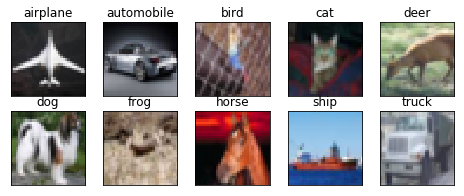

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)

plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Model Architecture

Here, I've changed the model from having Dense layers to the actual Convolution layers.

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 1), input_shape=(32, 32, 3)))
model.add(Conv2D(32, (1, 3))) # 30 - 3rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 1))) # 28 - 5rf
model.add(Conv2D(64, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 1))) # 26 - 7rf
model.add(Conv2D(128, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 26 - 7rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - 8rf
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 1))) # 11 - 12rf
model.add(Conv2D(64, (1, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96, (3, 1))) # 9 - 14rf
model.add(Conv2D(96, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 1))) # 7 - 16rf
model.add(Conv2D(128, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 7 - 16 rf
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(Conv2D(32, (7, 1))) # 1 - 28rf
model.add(Conv2D(32, (1, 7)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10, (1, 1))) # 1 - 28rf

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        3104      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 30, 64)        6208      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        12352     
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 29s 74ms/step - loss: 1.5853 - acc: 0.4239 - val_loss: 1.7481 - val_acc: 0.4348
Epoch 2/50
390/390 [==============================] - 24s 61ms/step - loss: 1.0983 - acc: 0.6088 - val_loss: 1.1866 - val_acc: 0.5830
Epoch 3/50
390/390 [==============================] - 24s 61ms/step - loss: 0.9085 - acc: 0.6802 - val_loss: 0.9604 - val_acc: 0.6653
Epoch 4/50
390/390 [==============================] - 24s 62ms/step - loss: 0.8011 - acc: 0.7197 - val_loss: 0.9702 - val_acc: 0.6601
Epoch 5/50
390/390 [==============================] - 24s 62ms/step - loss: 0.7239 - acc: 0.7471 - val_loss: 0.8261 - val_acc: 0.7124
Epoch 6/50
390/390 [==============================] - 24s 63ms/step - loss: 0.6616 - acc: 0.7691 - val_loss: 0.8258 - val_acc: 0.7106
Epoch 7/50
390/390 [==============================] - 25s 63ms/step - loss: 0.6177 - acc: 0.7844 - val_loss: 0.8926 - val_acc: 0.6997
Epoch 8/50
390/390 [==============================] - 25s 63ms

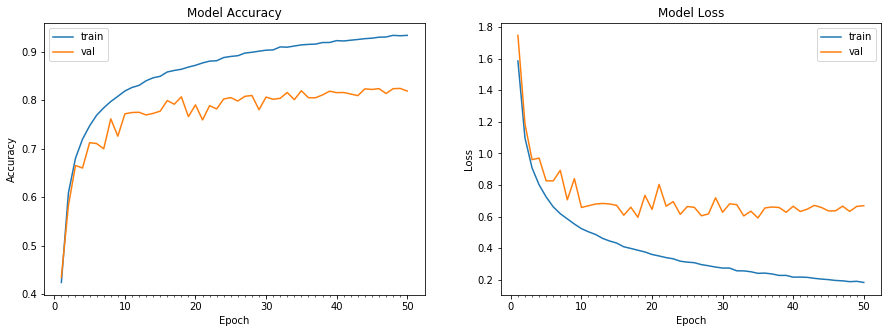

Accuracy on test data is: 81.90


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))